In [1]:
# Import Packages
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression



In [2]:
# Import Data Files
# Predictors
# Commodity Indices

predictors = pd.read_excel('./predictors_monthly.xlsx')
commodity = pd.read_excel('./Commodities_Monthly.xlsx')

In [3]:
predictors = predictors[46:].reset_index(drop=True)
commodity = commodity[35:].reset_index(drop=True)
commodity['date'] = predictors['date']
commodity = commodity.drop(['Year_Month', 'Grains_Spot'], axis=1)
commodity.set_index('date', inplace=True)
predictors.set_index('date', inplace=True)

Text(0, 0.5, 'Spot')

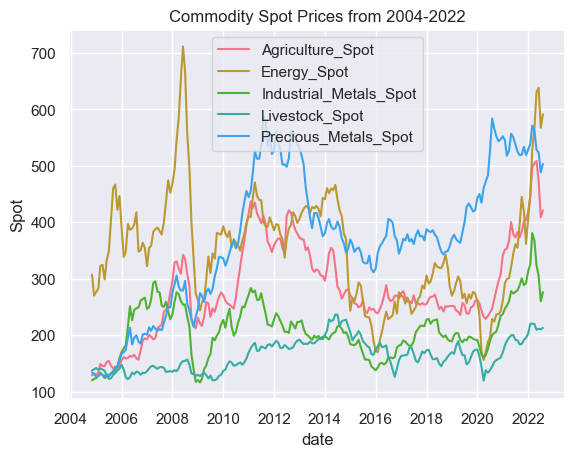

In [4]:
sns.set_theme()
sns.set_palette("husl")
ax = sns.lineplot(commodity, dashes=False)
ax.set_title("Commodity Spot Prices from 2004-2022")
ax.set_ylabel("Spot")

Text(0.5, 1.0, 'Auto-Correlations')

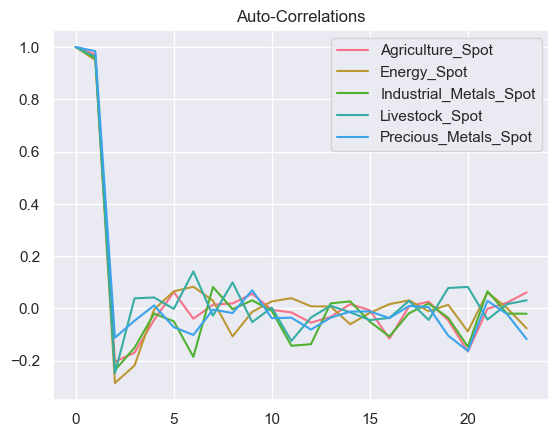

In [5]:
for com in commodity:
    pacf=sm.tsa.stattools.pacf(commodity[com])
    ax = sns.lineplot(pacf, label=com)
ax.set_title("Auto-Correlations")


### Extracting Lags ==> REDO

['Agriculture_Spot', 'Energy_Spot', 'Grains_Spot', 'Industrial_Metals_Spot', 'Livestock_Spot', 'Precious_Metals_Spot']

In [93]:
lags = []
for com in commodity.columns:
    for pred in predictors.columns:
        ccf = sm.tsa.stattools.ccf(predictors[pred],commodity[com],adjusted=False)
        ccf = ccf[:13]  # get only 12 months leads
        # REDO
        lcorr = [i for i in ccf if i > 0.7]
        if len(lcorr):
            min_val = min(lcorr)        
            print(com, pred, min_val, np.where(ccf == min_val))

Agriculture_Spot XAU BGN Curncy 0.7090104957582194 (array([3], dtype=int64),)
Agriculture_Spot XAG BGN Curncy 0.7157845942795195 (array([4], dtype=int64),)
Agriculture_Spot Canada 0.7230846034998569 (array([3], dtype=int64),)
Agriculture_Spot Mexico 0.7140767225361311 (array([0], dtype=int64),)
Agriculture_Spot Latin America & Caribbean 0.7042503846015139 (array([2], dtype=int64),)
Agriculture_Spot Colombia 0.7107553452867734 (array([3], dtype=int64),)
Agriculture_Spot Russian Federation 0.71638874438696 (array([4], dtype=int64),)
Livestock_Spot Mexico 0.7337529205911614 (array([0], dtype=int64),)
Precious_Metals_Spot CPURNSA Index 0.7084779672450313 (array([4], dtype=int64),)
Precious_Metals_Spot ERP 0.7027028152460633 (array([0], dtype=int64),)
Precious_Metals_Spot XAU BGN Curncy 0.7217541981096092 (array([11], dtype=int64),)
Precious_Metals_Spot XAG BGN Curncy 0.7056513804881883 (array([6], dtype=int64),)
Precious_Metals_Spot Canada 0.720421736254243 (array([10], dtype=int64),)
Prec

C:\Users\Arushi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_signaltools.py:240: RuntimeWarning: Use of fft convolution on input with NAN or inf results in NAN or inf output. Consider using method='direct' instead.
  return convolve(in1, _reverse_and_conj(in2), mode, method)


In [105]:
# Identify Signficant Predictors and corresponding lags

# corr = signal.correlate(predictors['INDPRO'],commodity['Energy_Spot'])
# corr /= np.max(corr)
# plt.plot(corr)

lags_indpro=[]

for comm in commodity.keys()[1:]:

    ccf=sm.tsa.stattools.ccf(predictors['INDPRO'][11:],commodity[comm],adjusted=False)
#     plt.plot(ccf)
    lags_indpro=lags_indpro+[np.argmax(ccf)]

lags_indpro

[81, 85, 0, 1, 0, 81]

In [106]:
# Identify Signficant Predictors and corresponding lags

lags_m1=[]

for comm in commodity.keys()[1:]:

    ccf=sm.tsa.stattools.ccf(predictors['M1'][11:],commodity[comm],adjusted=False)
#     plt.plot(ccf)
    lags_m1=lags_m1+[np.argmax(ccf)]

lags_m1

[113, 166, 0, 0, 85, 0]

In [107]:
lags_m2=[]

for comm in commodity.keys()[1:]:

    ccf=sm.tsa.stattools.ccf(predictors['M2'][11:],commodity[comm],adjusted=False)
#     plt.plot(ccf)
    lags_m2=lags_m2+[np.argmax(ccf)]

lags_m2

[0, 95, 0, 0, 0, 0]

In [108]:
lags_unemp=[]

for comm in commodity.keys()[1:]:

    ccf=sm.tsa.stattools.ccf(predictors['Unemployment Rate'][11:],commodity[comm],adjusted=False)
#     plt.plot(ccf)
    lags_unemp=lags_unemp+[np.argmax(ccf)]

lags_unemp

[148, 23, 156, 30, 157, 159]

Lags are too large and cannot be used directly

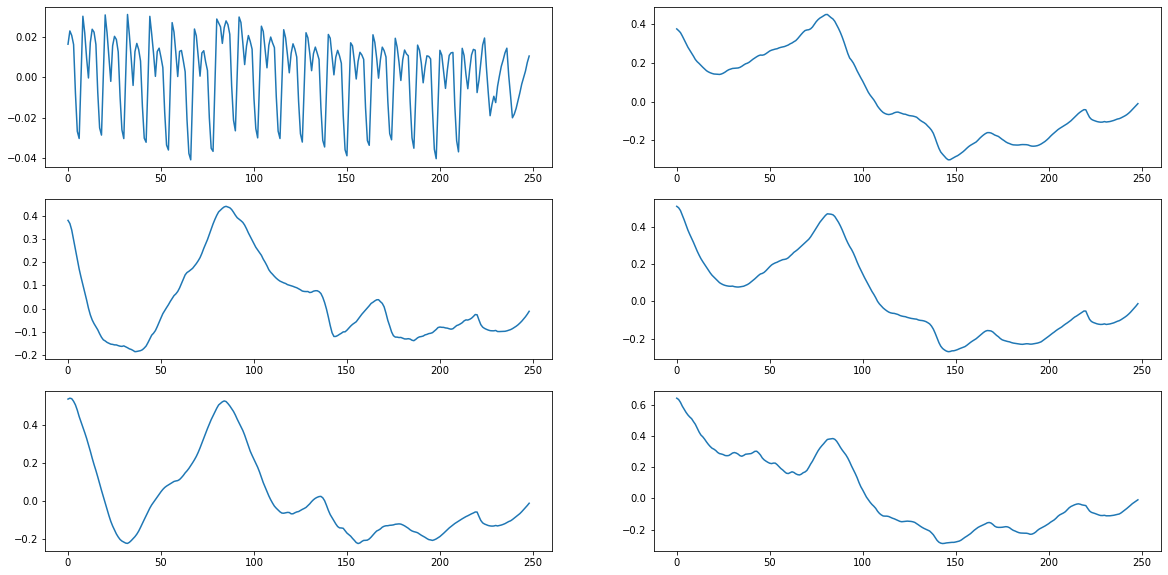

In [88]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10))

for i in range(3):
    for j in range(2):
        axes[i][j].plot(sm.tsa.stattools.ccf(predictors['INDPRO'][11:],commodity[commodity.keys()[2*i+j]],adjusted=False))


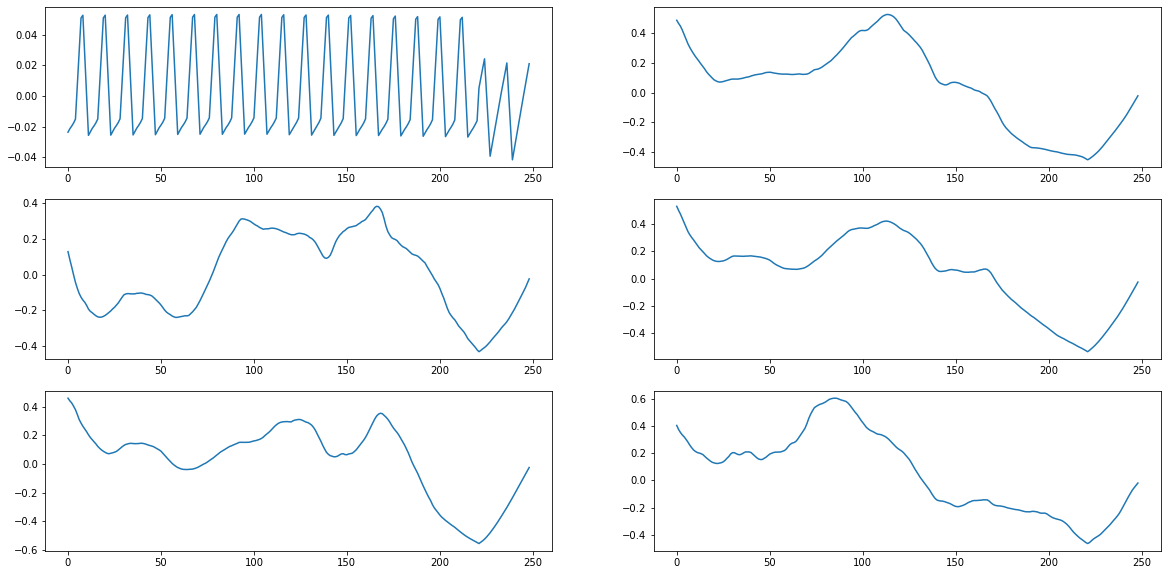

In [89]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10))

for i in range(3):
    for j in range(2):
        axes[i][j].plot(sm.tsa.stattools.ccf(predictors['M1'][11:],commodity[commodity.keys()[2*i+j]],adjusted=False))


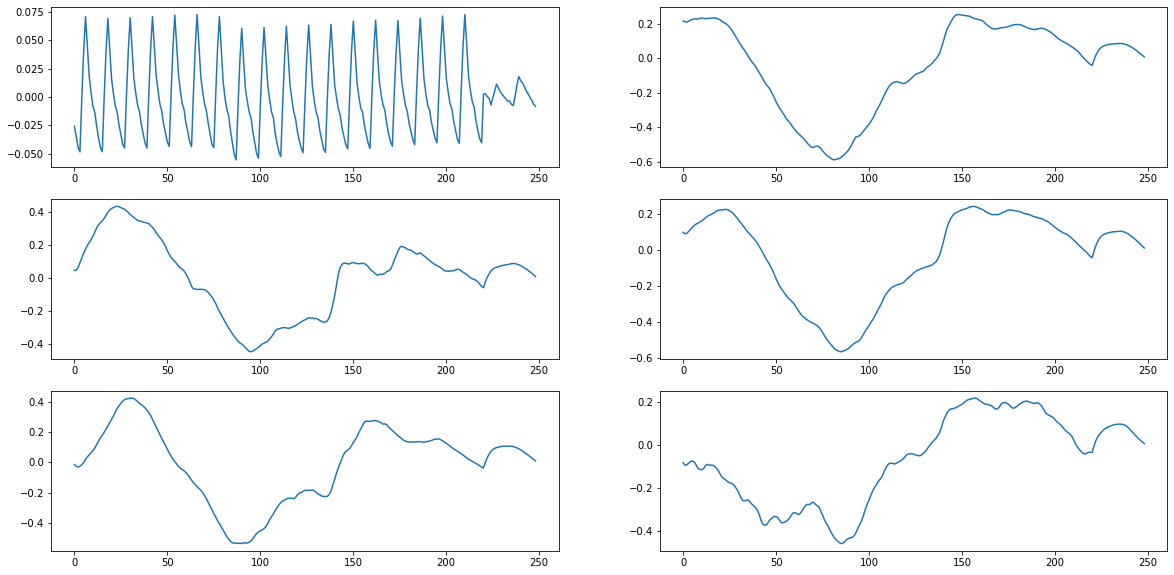

In [91]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10))

for i in range(3):
    for j in range(2):
        axes[i][j].plot(sm.tsa.stattools.ccf(predictors['Unemployment Rate'][11:],commodity[commodity.keys()[2*i+j]],adjusted=False))


### Experiments

In [6]:
predictors['CPI Change'] = predictors['CPURNSA Index'].diff()
predictors = predictors[1:]
commodity = commodity[1:]

In [7]:
pred_orig = predictors
comm_orig = commodity

In [8]:
# Predict 3 months into the future
predictors = predictors[:-3]
commodity = commodity[3:]

In [9]:
# Normalize Predictors
predictors = (predictors-predictors.min())/(predictors.max()-predictors.min())


In [10]:
# Split into training and testing
pd = 12
trainX = predictors[:-pd]
testX = predictors[-pd:]
trainY = commodity[:-pd]
testY = commodity[-pd:]

In [11]:
def helper_results(com, data):
    model = LinearRegression()
    model = model.fit(data, trainY[com])
    print(f"Train Score: {model.score(data, trainY[com])}")
    pred = model.predict(testX[data.columns])
    r2 = r2_score(testY[com], pred)
    print(f"Test Score: {r2}")
    

#### Inflation Predictors

In [12]:
for com in commodity:
    print(f"Predictions for commodity {com}")
    data = trainX[['CPI Change', 'RR2YCUS Index']]
    helper_results(com, data)
    

Predictions for commodity Agriculture_Spot
Train Score: 0.4437794152293818
Test Score: 0.45957883979375014
Predictions for commodity Energy_Spot
Train Score: 0.10189602723366176
Test Score: -2.8983086579564565
Predictions for commodity Industrial_Metals_Spot
Train Score: 0.09365363521384629
Test Score: -9.560440628937693
Predictions for commodity Livestock_Spot
Train Score: 0.3565925925587319
Test Score: -0.2946308922665002
Predictions for commodity Precious_Metals_Spot
Train Score: 0.5783766405389281
Test Score: -28.923083441644618


#### Demand Predictors

In [32]:
heatmap = predictors[['EHGDUSY Index'] + list(predictors.columns[14:26])].corr()
heatmap

,EHGDUSY Index,Canada,China,European Union,Mexico,Japan,"Korea, Rep.",Germany,India,Latin America & Caribbean,Colombia,Saudi Arabia,Russian Federation
EHGDUSY Index,1.000000,-0.076744,0.023957,-0.175661,0.104456,-0.338679,0.121252,-0.082416,-0.005256,-0.153410,-0.124195,0.020677,-0.112423
Canada,-0.076744,1.000000,0.768200,0.809936,0.919132,0.343497,0.722768,0.880373,0.754629,0.823605,0.849503,0.907447,0.849437
China,0.023957,0.768200,1.000000,0.646689,0.762409,-0.098493,0.973083,0.847190,0.990306,0.584384,0.600288,0.909458,0.398509
European Union,-0.175661,0.809936,0.646689,1.000000,0.688146,0.212599,0.574880,0.945904,0.649518,0.538248,0.554442,0.690467,0.626424
Mexico,0.104456,0.919132,0.762409,0.688146,1.000000,0.104372,0.779020,0.817950,0.737668,0.835684,0.864504,0.927050,0.804129
Japan,-0.338679,0.343497,-0.098493,0.212599,0.104372,1.000000,-0.195377,0.099627,-0.054680,0.457719,0.445135,0.163657,0.577993
"Korea, Rep.",0.121252,0.722768,0.973083,0.574880,0.779020,-0.195377,1.000000,0.800303,0.971531,0.567383,0.578077,0.893029,0.361350
Germany,-0.082416,0.880373,0.847190,0.945904,0.817950,0.099627,0.800303,1.000000,0.843111,0.641504,0.662209,0.864062,0.630440
India,-0.005256,0.754629,0.990306,0.649518,0.737668,-0.054680,0.971531,0.843111,1.000000,0.593215,0.595017,0.898746,0.381740
Latin America & Caribbean,-0.153410,0.823605,0.584384,0.538248,0.835684,0.457719,0.567383,0.641504,0.593215,1.000000,0.988426,0.835340,0.878464


<AxesSubplot: >

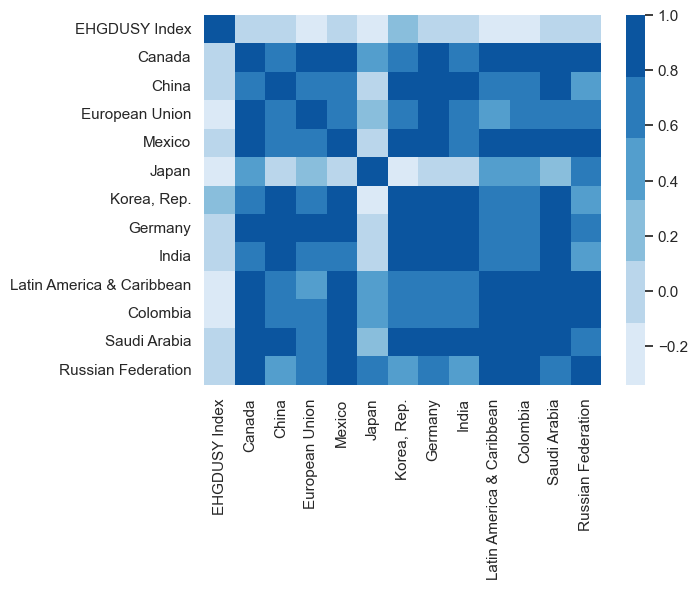

In [33]:
sns.heatmap(heatmap, cmap=sns.color_palette("Blues"))

In [13]:
exports = {
    'Agriculture_Spot': ['Canada', 'China', 'Mexico', 'Japan'],
    'Energy_Spot': ['Mexico', 'China', 'India', 'Korea, Rep.'], 
    'Grains_Spot':[],
    'Industrial_Metals_Spot': ['Latin America & Caribbean', 'Canada', 'Mexico'], 
    'Livestock_Spot':['China', 'Japan', 'Korea, Rep.'], 
    'Precious_Metals_Spot': ['China', 'Canada', 'Mexico']
}

In [14]:
for com in commodity:
    print("::::::::::::::::::::::")
    print(f"PREDICTING {com} using GDP US")
    data = trainX[['CPI Change', 'RR2YCUS Index', 'EHGDUSY Index']]
    helper_results(com, data)
    

    for country in exports[com]:
        print(f"PREDICTING {com} using GDP {country}")
        data = trainX[['CPI Change', 'RR2YCUS Index', 'EHGDUSY Index']+[country]]
        helper_results(com, data)
        

::::::::::::::::::::::
PREDICTING Agriculture_Spot using GDP US
Train Score: 0.445125539500138
Test Score: 0.2650010209145187
PREDICTING Agriculture_Spot using GDP Canada
Train Score: 0.6795552619248485
Test Score: -0.011898770162289463
PREDICTING Agriculture_Spot using GDP China
Train Score: 0.45191261070933675
Test Score: 0.31568922384441434
PREDICTING Agriculture_Spot using GDP Mexico
Train Score: 0.5752719118785572
Test Score: -1.4499203986121438
PREDICTING Agriculture_Spot using GDP Japan
Train Score: 0.653027107558624
Test Score: -0.5797880997164848
::::::::::::::::::::::
PREDICTING Energy_Spot using GDP US
Train Score: 0.10299894345887395
Test Score: -3.3815950426336823
PREDICTING Energy_Spot using GDP Mexico
Train Score: 0.11897475401414137
Test Score: -4.223082611262819
PREDICTING Energy_Spot using GDP China
Train Score: 0.3953647601406485
Test Score: -2.9409498692538603
PREDICTING Energy_Spot using GDP India
Train Score: 0.41911922914186583
Test Score: -3.30866419422431
PREDI

#### Supply

In [15]:
imports = {
    'Agriculture_Spot': ['Canada', 'China', 'Mexico', 'European Union'],
    'Energy_Spot': ['Canada', 'Colombia', 'Mexico', 'Saudi Arabia', 'Russian Federation'], 
    'Grains_Spot':[],
    'Industrial_Metals_Spot': ['China', 'Mexico', 'Germany', 'India'], 
    'Livestock_Spot':['China', 'Japan', 'Canada', 'Mexico'], 
    'Precious_Metals_Spot': []
}

In [16]:
for com in commodity:
    print("::::::::::::::::::::::")
    print(f"PREDICTING {com} using INDPRO US")
    data = trainX[['CPI Change', 'RR2YCUS Index', 'INDPRO']]
    helper_results(com, data)
    for country in imports[com]:
        print(f"PREDICTING {com} using GDP {country}")
        data = trainX[['CPI Change', 'RR2YCUS Index', 'INDPRO']+[country]]
        helper_results(com, data)
        

::::::::::::::::::::::
PREDICTING Agriculture_Spot using INDPRO US
Train Score: 0.44421225344939386
Test Score: 0.43696930296581804
PREDICTING Agriculture_Spot using GDP Canada
Train Score: 0.7052093546014119
Test Score: -0.48748140171845966
PREDICTING Agriculture_Spot using GDP China
Train Score: 0.45163072000508375
Test Score: 0.5080492030581321
PREDICTING Agriculture_Spot using GDP Mexico
Train Score: 0.6412079721171897
Test Score: -1.6112645625317779
PREDICTING Agriculture_Spot using GDP European Union
Train Score: 0.6063374567451322
Test Score: 0.36272571987786406
::::::::::::::::::::::
PREDICTING Energy_Spot using INDPRO US
Train Score: 0.10791090380945201
Test Score: -3.280180904363636
PREDICTING Energy_Spot using GDP Canada
Train Score: 0.1351942314373198
Test Score: -3.825155233942426
PREDICTING Energy_Spot using GDP Colombia
Train Score: 0.1672291944301072
Test Score: -7.340004829240293
PREDICTING Energy_Spot using GDP Mexico
Train Score: 0.14909627395428382
Test Score: -4.75

#### Interest Rates and Money Supply

In [17]:
ms = ['M1', 'M2']

In [18]:
for com in commodity:
    print("::::::::::::::::::::::")
    print(f"PREDICTING {com} using Bill Rates")
    data = trainX[['CPI Change', 'RR2YCUS Index', 'Bill Rate 13 week']]
    helper_results(com,data)
    for m in ms:
        print(f"PREDICTING {com} using money supply {m}")
        data = trainX[['CPI Change', 'RR2YCUS Index', 'Bill Rate 13 week']+[m]]
        helper_results(com,data)


::::::::::::::::::::::
PREDICTING Agriculture_Spot using Bill Rates
Train Score: 0.4483487724147971
Test Score: -0.09365294195557117
PREDICTING Agriculture_Spot using money supply M1
Train Score: 0.44835947729335
Test Score: -0.1095652542807033
PREDICTING Agriculture_Spot using money supply M2
Train Score: 0.4620996587527343
Test Score: -0.13629479151933288
::::::::::::::::::::::
PREDICTING Energy_Spot using Bill Rates
Train Score: 0.10303637093509899
Test Score: -3.5602948535801007
PREDICTING Energy_Spot using money supply M1
Train Score: 0.19041716307135048
Test Score: -6.610789629208369
PREDICTING Energy_Spot using money supply M2
Train Score: 0.43119883647042134
Test Score: -4.218217600610011
::::::::::::::::::::::
PREDICTING Industrial_Metals_Spot using Bill Rates
Train Score: 0.11241184533622761
Test Score: -4.833403854357504
PREDICTING Industrial_Metals_Spot using money supply M1
Train Score: 0.1504950837237239
Test Score: -2.7963261201070804
PREDICTING Industrial_Metals_Spot us

#### Financial Indicators

In [19]:
fin = ['VIX Index', 'XAU BGN Curncy', 'XAG BGN Curncy'] # 'MSCI US Equity' is not available before 2007, 'BBDXY is avaliable after 2004'

In [20]:
for com in commodity:
    print("::::::::::::::::::::::")
    print(f"PREDICTING {com} using Broad Dollar")
    data = trainX[['CPI Change', 'RR2YCUS Index', 'BBDXY Index']]
    helper_results(com, data)
    for m in fin:
        print(f"PREDICTING {com} using financial indicator {m}")
        data = trainX[['CPI Change', 'RR2YCUS Index', 'BBDXY Index']+[m]][-210:]
        helper_results(com, data)


::::::::::::::::::::::
PREDICTING Agriculture_Spot using Broad Dollar
Train Score: 0.5961701075277973
Test Score: -0.0846591276059303
PREDICTING Agriculture_Spot using financial indicator VIX Index
Train Score: 0.5979474071298465
Test Score: -0.1453419625468091
PREDICTING Agriculture_Spot using financial indicator XAU BGN Curncy
Train Score: 0.7723158906714943
Test Score: -3.0560779784242484
PREDICTING Agriculture_Spot using financial indicator XAG BGN Curncy
Train Score: 0.7803815949136359
Test Score: -3.3946508154801327
::::::::::::::::::::::
PREDICTING Energy_Spot using Broad Dollar
Train Score: 0.711358601552271
Test Score: -5.936414163815115
PREDICTING Energy_Spot using financial indicator VIX Index
Train Score: 0.7166894915352502
Test Score: -6.1292994652359765
PREDICTING Energy_Spot using financial indicator XAU BGN Curncy
Train Score: 0.7116074873300664
Test Score: -6.0687995293173564
PREDICTING Energy_Spot using financial indicator XAG BGN Curncy
Train Score: 0.711444278031357

#### Instability Predictors

In [21]:
inst = ['Unemployment Rate', 'ERP']

In [22]:
for com in commodity:
    print("::::::::::::::::::::::")
    print(f"PREDICTING {com} using Instability Indicators")
    data = trainX[['CPI Change', 'RR2YCUS Index']+inst]
    helper_results(com, data)

::::::::::::::::::::::
PREDICTING Agriculture_Spot using Instability Indicators
Train Score: 0.5533911468418131
Test Score: -2.363246120776671
::::::::::::::::::::::
PREDICTING Energy_Spot using Instability Indicators
Train Score: 0.22813115883098867
Test Score: -5.06735914017672
::::::::::::::::::::::
PREDICTING Industrial_Metals_Spot using Instability Indicators
Train Score: 0.23701536687029368
Test Score: -19.210799864198037
::::::::::::::::::::::
PREDICTING Livestock_Spot using Instability Indicators
Train Score: 0.390180573490178
Test Score: -1.1876473309947442
::::::::::::::::::::::
PREDICTING Precious_Metals_Spot using Instability Indicators
Train Score: 0.7932995075643509
Test Score: -0.11547399921100743


In [23]:
for com in commodity:
    print(f"Predictions for commodity {com}")
    data = trainX[['CPI Change', 'RR2YCUS Index']]
    helper_results(com, data)

Predictions for commodity Agriculture_Spot
Train Score: 0.4437794152293818
Test Score: 0.45957883979375014
Predictions for commodity Energy_Spot
Train Score: 0.10189602723366176
Test Score: -2.8983086579564565
Predictions for commodity Industrial_Metals_Spot
Train Score: 0.09365363521384629
Test Score: -9.560440628937693
Predictions for commodity Livestock_Spot
Train Score: 0.3565925925587319
Test Score: -0.2946308922665002
Predictions for commodity Precious_Metals_Spot
Train Score: 0.5783766405389281
Test Score: -28.923083441644618
